In [1]:
import numpy as np
import scipy as sp
from mrftools import *
from staghunt import StagHuntGame, StagHuntMRF

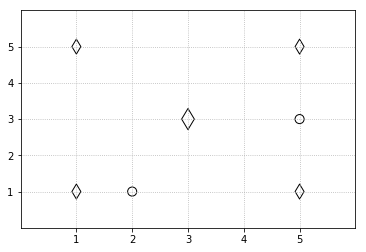

In [2]:
prova = StagHuntMRF()
prova.display()

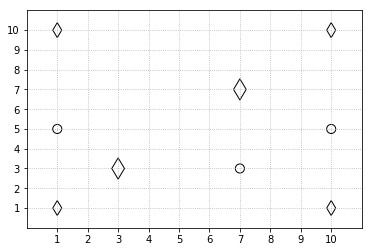

In [3]:
prova = StagHuntMRF()
prova.size = (10,10)
prova.aPos = [(1,5), (10,5), (7,3)]
prova.hPos = [(1,1), (10,10), (1,10), (10,1)]
prova.sPos = [(3,3), (7,7)]
prova.horizon = 15
prova.display()

In [3]:
prova.build_model()
prova.slow_infer()
prova.print_trajectories()

Belief propagation finished in 14 iterations.
Agent 1 (3, 4)  ->  (3, 5)
Agent 1 (3, 2)  ->  (3, 1)
Agent 1 (3, 2)  ->  (3, 1)
Agent 1 (3, 4)  ->  (3, 5)
Agent 1 (3, 2)  ->  (3, 1)
Agent 1 (3, 2)  ->  (3, 1)
Agent 1 (2, 2)  ->  (2, 1)
Agent 1 (5, 4)  ->  (5, 5)
Agent 1 (1, 5)  ->  (1, 5)
Agent 2 (4, 3)  ->  (5, 3)
Agent 2 (4, 3)  ->  (5, 3)
Agent 2 (3, 2)  ->  (3, 1)
Agent 2 (3, 4)  ->  (3, 5)
Agent 2 (3, 4)  ->  (3, 5)
Agent 2 (4, 3)  ->  (5, 3)
Agent 2 (2, 2)  ->  (1, 2)
Agent 2 (4, 1)  ->  (5, 1)
Agent 2 (1, 1)  ->  (1, 1)


In [4]:
np.sum(np.exp(prova.bp.pair_beliefs[('x11', 'x21')]))

1.0000000000000002

In [19]:
np.allclose(np.sum(np.exp(prova.bp.pair_beliefs[('x11', 'x21')]), 1), np.exp(prova.bp.var_beliefs['x11']))

True

In [16]:
np.sum(np.array([[1,1,1],[2,2,2],[3,3,3]]),axis=1)

array([3, 6, 9])

In [9]:
caca = np.exp(prova.bp.pair_beliefs[('x21', 'x11')]) / np.exp(prova.bp.var_beliefs['x11'])
caca = caca
np.sum(caca, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
np.sum(caca, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
caca.markov_net.edge_potentials

{('x11',
  'x21'): array([[1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0

In [17]:
transition = slow_bp.pair_beliefs[('x72','x82')]
np.unravel_index(np.argmax(transition), transition.shape) 

(12, 12)

In [52]:
mn = MarkovNet()

np.random.seed(1)

k = [4, 3, 6, 2, 5]

mn.set_unary_factor(0, np.random.randn(k[0]))
mn.set_unary_factor(1, np.random.randn(k[1]))
mn.set_unary_factor(2, np.random.randn(k[2]))
mn.set_unary_factor(3, np.random.randn(k[3]))

factor4 = np.random.randn(k[4])
factor4[2] = -float('inf')

mn.set_unary_factor(4, factor4)

mn.set_edge_factor((0, 1), np.random.randn(k[0], k[1]))
mn.set_edge_factor((1, 2), np.random.randn(k[1], k[2]))
mn.set_edge_factor((2, 3), np.random.randn(k[2], k[3]))
mn.set_edge_factor((3, 4), np.random.randn(k[3], k[4]))

In [56]:
mn.unary_potentials

{0: array([ 0.16003707,  0.87616892,  0.31563495, -2.02220122]),
 1: array([ 0.86540763, -2.3015387 ,  1.74481176]),
 2: array([-0.7612069 ,  0.3190391 , -0.24937038,  1.46210794, -2.06014071,
        -0.3224172 ]),
 3: array([-0.38405435,  1.13376944]),
 4: array([-1.09989127, -0.17242821,        -inf,  0.04221375,  0.58281521])}

In [55]:
mn.set_unary_factor(0, np.random.randn(k[0]))

In [12]:
agent_index = 1
stag_index = 1
var_key = 'd' + str(agent_index) + str(stag_index)

In [15]:
k = [4, 3, 6, 2, 5]
np.random.randn(k[0], k[1])

array([[-0.25586242,  0.18876714, -0.89756783],
       [-0.64972053,  0.97595561, -0.49482713],
       [ 1.01370793,  0.23540329,  0.32133393],
       [-0.91223975, -0.42969196,  1.57956671]])

In [27]:
uep[1,2]

0.0

In [26]:
uep.shape[0]

2

In [9]:
import itertools
for i, element in enumerate(itertools.product([0,1], [0,1], [0,1,2])):
    print(i, element, phi_r1(*element))

0 (0, 0, 0) 1
1 (0, 0, 1) 0
2 (0, 0, 2) 0
3 (0, 1, 0) 0
4 (0, 1, 1) 1
5 (0, 1, 2) 0
6 (1, 0, 0) 0
7 (1, 0, 1) 1
8 (1, 0, 2) 0
9 (1, 1, 0) 0
10 (1, 1, 1) 0
11 (1, 1, 2) 1


In [48]:
uep = np.zeros((12,2))
for i, element in enumerate(itertools.product([0,1], [0,1], [0,1,2])):
    print (element)
    for j in range(2):
        if j == element[0]: # indicator function appendix
            uep[i,j] = phi_r1(*element)
uep

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)


array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.]])

In [69]:
def phi_r1(d1,d2,u1):
    condition = ((d1 == 0) and (d2 == 0) and (u1 == 0)) or \
                ((d1 == 1) and (d2 == 1) and (u1 == 2)) or \
                ((d1 != d2) and (u1 == 1))
    return 1 if condition else 0

def phi_ri(u1,d2,u2):
    condition = ((d2 == 0) and (u1 == u2)) or \
                ((d2 == 1) and (u1 == 0) and (u2 == 1)) or \
                ((d2 == 1) and (u1 == 1) and (u2 == 2)) or \
                ((d2 == 1) and (u1 == 2) and (u2 == 2))
    return 1 if condition else 0

def phi_ri(v1, v2, v3):
    z_card = len(v1) * len(v2) * len(v3)
    if z_card == 12:
        condition = ((v1 == 0) and (v2 == 0) and (v3 == 0)) or \
                    ((v1 == 1) and (v2 == 1) and (v3 == 2)) or \
                    ((v1 != d2) and (v3 == 1))
    elif z_card == 18:
        condition = ((v2 == 0) and (v1 == u2)) or \
                    ((v2 == 1) and (v1 == 0) and (u2 == 1)) or \
                    ((v2 == 1) and (v1 == 1) and (u2 == 2)) or \
                    ((v2 == 1) and (v1 == 2) and (u2 == 2))

def edge_factor(var_tuple, pos):
    z_card = np.prod([len(v) for v in var_tuple])  # cardinality of new var z
    x_card = len(var_tuple[pos])  # cardinality of old var x1, x2, x3
    factor = np.zeros((z_card, x_card)) 
    for i, el in enumerate(itertools.product(*var_tuple)):
        for j in range(x_card): 
            if j == el[pos]: # indicator function
                if z_card == 12:
                    factor[i, j] = phi_r1(*el)
                elif z_card == 18:
                    factor[i, j] = phi_ri(*el)
    return factor

uep = np.zeros((12,2))
for i, element in enumerate(itertools.product([0,1], [0,1], [0,1,2])):
    print (element)
    for j in range(2):
        if j == element[0]: # indicator function appendix
            uep[i,j] = phi_ri(*element)
uep

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)


array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.]])

In [76]:
edge_factor(([0,1,2], [0,1], [0,1,2]), 2)

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.]])

In [51]:
np.exp(prova.bp.var_beliefs['x11'])

array([0.03481035, 0.1003217 , 0.03702526, 0.03690629, 0.03481035,
       0.03690629, 0.03924017, 0.03937824, 0.03924017, 0.03690629,
       0.03702526, 0.03937824, 0.03951824, 0.03937824, 0.03702526,
       0.03690629, 0.03924017, 0.03937824, 0.03924017, 0.03690629,
       0.03481035, 0.03690629, 0.03702526, 0.03690629, 0.03481035])

In [60]:
np.exp(prova.bp.pair_beliefs[('x11','x21')])/np.exp(prova.bp.var_beliefs['x11'])

array([[0.08424311, 0.03099131, 0.03099131, 0.03099131, 0.03099131,
        0.0842431 , 0.03099131, 0.0309913 , 0.03099131, 0.03099131,
        0.03099131, 0.0309913 , 0.0309913 , 0.0309913 , 0.03099131,
        0.03099131, 0.03099131, 0.0309913 , 0.03099131, 0.03099131,
        0.03099131, 0.03099131, 0.03099131, 0.03099131, 0.03099131],
       [0.2289965 , 0.0842431 , 0.2289965 , 0.0842431 , 0.08424311,
        0.0842431 , 0.2289965 , 0.0842431 , 0.0842431 , 0.0842431 ,
        0.0842431 , 0.0842431 , 0.0842431 , 0.0842431 , 0.0842431 ,
        0.0842431 , 0.0842431 , 0.0842431 , 0.0842431 , 0.0842431 ,
        0.08424311, 0.0842431 , 0.0842431 , 0.0842431 , 0.08424311],
       [0.03099131, 0.03099131, 0.0842431 , 0.0842431 , 0.03099131,
        0.03099131, 0.03099131, 0.0842431 , 0.03099131, 0.03099131,
        0.03099131, 0.0309913 , 0.0309913 , 0.0309913 , 0.03099131,
        0.03099131, 0.03099131, 0.0309913 , 0.03099131, 0.03099131,
        0.03099131, 0.03099131, 0.03099131, 0.

In [61]:
np.sum([0.08424311, 0.03099131, 0.03099131, 0.03099131, 0.03099131,
        0.0842431 , 0.03099131, 0.0309913 , 0.03099131, 0.03099131,
        0.03099131, 0.0309913 , 0.0309913 , 0.0309913 , 0.03099131,
        0.03099131, 0.03099131, 0.0309913 , 0.03099131, 0.03099131,
        0.03099131, 0.03099131, 0.03099131, 0.03099131, 0.03099131])

0.88128629

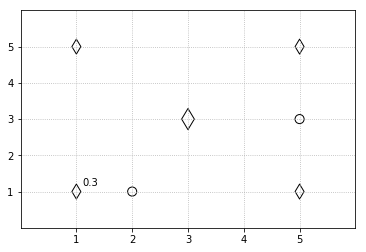

In [29]:
s_x, s_y = np.transpose(np.array(prova.sPos))
h_x, h_y = np.transpose(np.array(prova.hPos))
a_x, a_y = np.transpose(np.array(prova.aPos))
size_x, size_y = prova.size

plt.scatter(h_x, h_y, marker='d', s=112, facecolors='none', edgecolors='k')
plt.scatter(s_x, s_y, marker='d', s=224, facecolors='none', edgecolors='k')
plt.scatter(a_x, a_y, s=82, facecolors='none', edgecolors='k')

plt.xlim((0, size_x + 1))
plt.ylim((0, size_y + 1))
plt.xticks(np.arange(1, size_x + 1))
plt.yticks(np.arange(1, size_y + 1))
plt.grid(linestyle='dotted')
plt.text(1.25, 1.25, '{:0.1f}'.format(0.3), ha='center', va='center')
plt.show()

In [3]:
prova = StagHuntMRF()
prova.build_model()
prova.slow_infer()
prova.bp.load_beliefs()

Belief propagation finished in 14 iterations.


In [4]:
var_probab = np.exp(prova.bp.var_beliefs['x12'])
pair_probab = np.exp(prova.bp.pair_beliefs[('x22','x12')])

In [5]:
np.allclose(var_probab, np.sum(pair_probab, axis=0))

True

In [6]:
conditional_probab = pair_probab / var_probab

In [7]:
np.unravel_index(np.argmax(conditional_probab), conditional_probab.shape)

(13, 14)

In [133]:
pair_beliefs_1

0

In [92]:
pair_beliefs_1 = prova.bp.pair_beliefs[('x11','x21')]
pair_beliefs_2 = prova.bp.pair_beliefs[('x21','x11')]

In [94]:
pair_beliefs_1 == np.transpose(pair_beliefs_2)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],


In [33]:
prova.get_index((1,2))

5

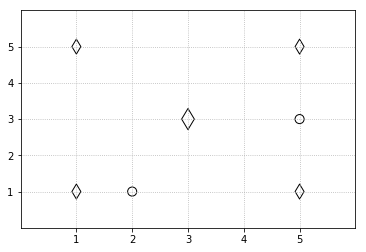

In [25]:
prova.display()

In [57]:
bp.infer(display='full')
bp.compute_pairwise_beliefs()

Iteration 0, change in messages 23.383770. Calibration disagreement: 0.042679, energy functional: 34.489754, dual obj: 34.488311
Iteration 1, change in messages 2.620807. Calibration disagreement: 0.004171, energy functional: 34.489696, dual obj: 34.489543
Iteration 2, change in messages 0.320903. Calibration disagreement: 0.000246, energy functional: 34.489637, dual obj: 34.489626
Iteration 3, change in messages 0.026004. Calibration disagreement: 0.000022, energy functional: 34.489633, dual obj: 34.489632
Iteration 4, change in messages 0.001727. Calibration disagreement: 0.000002, energy functional: 34.489633, dual obj: 34.489633
Iteration 5, change in messages 0.000209. Calibration disagreement: 0.000000, energy functional: 34.489633, dual obj: 34.489633
Iteration 6, change in messages 0.000012. Calibration disagreement: 0.000000, energy functional: 34.489633, dual obj: 34.489633
Iteration 7, change in messages 0.000000. Calibration disagreement: 0.000000, energy functional: 34.489

In [72]:
uep = np.exp(bp.pair_beliefs[('x11','x21')])
uep2 = np.transpose(np.transpose(uep) / np.exp(bp.var_beliefs['x11']))
np.unravel_index(np.argmax(uep2), uep2.shape)

(3, 8)

In [75]:
get_pos(8, N)

(4.0, 2.0)

In [38]:
phi_q_factor*np.exp(bp.pair_beliefs[('x21','x31')])

array([[0.0032148 , 0.00338874, 0.        , 0.        , 0.        ,
        0.00338874, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00337341, 0.00355593, 0.0035107 , 0.        , 0.        ,
        0.        , 0.00369322, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00355593, 0.0035107 , 0.00355593, 0.        ,
        0.        , 0.        , 0.00372718, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [44]:
from staghunt import *
ground_test = StagHuntMRF()
ground_test.build_ground_model()
ground_test.slow_infer()
caca = phi_q_factor*np.exp(ground_test.bp.pair_beliefs[('x31','x41')])

Belief propagation finished in 8 iterations.


In [45]:
from staghunt import *
test = StagHuntMRF()
test.build_model()
test.slow_infer()
caca2 = phi_q_factor*np.exp(test.bp.pair_beliefs[('x31','x41')])

Belief propagation finished in 11 iterations.


In [46]:
np.max(caca - caca2)

0.00045887223798003274

In [47]:
caca

array([[0.0037741 , 0.00302454, 0.        , 0.        , 0.        ,
        0.00302454, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00403097, 0.00323039, 0.00323039, 0.        , 0.        ,
        0.        , 0.00323039, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00320948, 0.00320948, 0.00320948, 0.        ,
        0.        , 0.        , 0.00320948, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [54]:
np.sum(np.exp(bp.pair_beliefs[('x21','x31')]), axis = 1)

array([0.03765579, 0.04181968, 0.04195652, 0.03844094, 0.03446336,
       0.03844094, 0.0465169 , 0.04298366, 0.04292744, 0.03844094,
       0.03856672, 0.04298366, 0.04315736, 0.04298366, 0.03856672,
       0.03844094, 0.04292744, 0.04298366, 0.04292744, 0.03844094,
       0.03446336, 0.03844094, 0.03856672, 0.03844094, 0.03446336])

In [53]:
np.exp(bp.var_beliefs['x21'])

array([0.03765579, 0.04181968, 0.04195652, 0.03844094, 0.03446336,
       0.03844094, 0.0465169 , 0.04298366, 0.04292744, 0.03844094,
       0.03856672, 0.04298366, 0.04315736, 0.04298366, 0.03856672,
       0.03844094, 0.04292744, 0.04298366, 0.04292744, 0.03844094,
       0.03446336, 0.03844094, 0.03856672, 0.03844094, 0.03446336])